In [17]:
import tensorflow as tf 
import cv2
import os 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical


In [18]:
train_dir=r"F:\it18021\archive\train/"
labelEm={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
classes=['0','1','2','3','4','5','6']

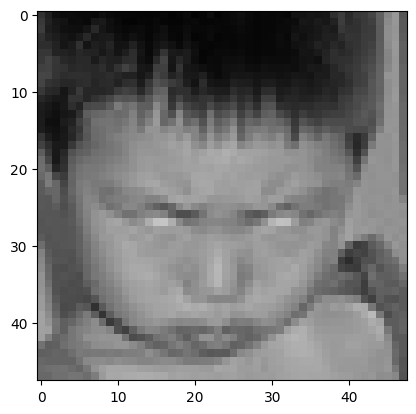

In [25]:
for category in classes:
    
    path= os.path.join(train_dir,category)
    for img in os.listdir(path):
        img_arr=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB))
        plt.show()
        
        break
    break

In [26]:
img_arr.shape

(48, 48, 3)

In [31]:
training_data=[]
def create_trainingData():
    for category in classes :
        path = os.path.join(train_dir,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            break
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [28]:
create_trainingData()

In [29]:
print(len(training_data))

0


In [ ]:
import random 
random.shuffle(training_data)

In [ ]:
img_size=224 
X=[] #feature 
y=[] #label emotion 
for features,label in training_data:
    X.append(features)
    y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)

In [ ]:
X.shape

In [ ]:
X[0].shape

In [ ]:
X=X/255.0 #rescaling 

In [ ]:
y=np.array(y)

In [ ]:
#testing data generate 
test_dir=r"F:\it18021\archive\test/"
labelEm={'angry':0,'disgust':1,'fear':2,'happy':3,'neutral':4,'sad':5,'surprise':6}
classes=['0','1','2','3','4','5','6']

In [ ]:
test_data=[]
def create_testData():
    for category in classes :
        path = os.path.join(test_dir,category)
        class_num = classes.index(category)
        for img in os.listdir(path):
            try: 
                img_array= cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array,(img_size,img_size))
                test_data.append([new_array,class_num])
            except Exception as e:
                pass
            

In [ ]:
create_testData()

In [ ]:
import random 
random.shuffle(test_data)
X_test=[] #feature 
y_test=[] #label emotion 
for features,label in test_data:
    X_test.append(features)
    y_test.append(label)
X_test=np.array(X_test).reshape(-1,img_size,img_size,3)

In [ ]:
X_test=X_test/255.0 #rescaling 

In [ ]:
y_test=np.array(y_test)

In [ ]:
#defining the model 
#transfer learning 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
#defing the model 
model= tf.keras.applications.MobileNetV2() 

In [ ]:
model.summary()

In [ ]:
model.trainable=False # freezing the layer 

In [ ]:
model.summary()

In [ ]:
base_input= model.layers[0].input

In [ ]:
base_output=model.layers[-2].output

In [ ]:
base_input

In [ ]:
base_output

In [ ]:
final_output= layers.Dense(128)(base_output)
final_output= layers.Activation('relu')(final_output)
final_output= layers.Dense(64)(final_output)
final_output= layers.Activation('relu')(final_output)
final_output= layers.Dense(7,activation='softmax')(final_output)

In [ ]:
final_output

In [ ]:
new_model= keras.Model(inputs= base_input,outputs=final_output)

In [ ]:
new_model.summary()

In [ ]:
new_model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
new_model.fit(X,y,epochs=15)

In [ ]:
new_model.evaluate(X_test,y_test)